# Ford GoBike Exploratory Analysis

### Description: Exploration into similarities, differences, and patterns between user types
 - Focus on duration, gender, age, user type, and month-to-month comparisons


## Import Requirements:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load the Master Dataset

In [2]:
!pwd

/Users/mattames/Desktop/ford_gobike


In [3]:
df = pd.read_csv('all_bikeshare_datasets/cleaned_datasets/master-dataset-v2.csv')

In [4]:
df.head()

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year
0,1035,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.402570,Subscriber,No,Male,1988
1,1673,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6,The Embarcadero at Sansome St,37.804770,-122.403234,324,Union Square (Powell St at Post St),37.788300,-122.408531,Customer,No,Male,1987
2,3498,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,Customer,No,Female,1986
3,3129,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,Customer,No,Male,1981
4,1839,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308,San Pedro Square,37.336802,-121.894090,297,Locust St at Grant St,37.322980,-121.887931,Subscriber,Yes,Female,1976


In [5]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197671 entries, 0 to 3197670
Data columns (total 16 columns):
bike_id                    3197671 non-null int64
duration_sec               3197671 non-null int64
start_time                 3197671 non-null object
end_time                   3197671 non-null object
start_station_id           3197671 non-null int64
start_station_name         3197671 non-null object
start_station_latitude     3197671 non-null float64
start_station_longitude    3197671 non-null float64
end_station_id             3197671 non-null int64
end_station_name           3197671 non-null object
end_station_latitude       3197671 non-null float64
end_station_longitude      3197671 non-null float64
user_type                  3197671 non-null object
bike_share_for_all_trip    3197671 non-null object
member_gender              3197671 non-null object
member_birth_year          3197671 non-null int64
dtypes: float64(4), int64(5), object(7)
memory usage: 390.3+ MB


In [6]:
# Re-convert datetime datatypes
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [7]:
# Confirm change
df.dtypes

bike_id                             int64
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
user_type                          object
bike_share_for_all_trip            object
member_gender                      object
member_birth_year                   int64
dtype: object

## Exploratory Analysis & Additional Cleaning

In [8]:
# Check statistics for numerical columns
df.describe()

,bike_id,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,member_birth_year
count,3.197671e+06,3.197671e+06,3.197671e+06,3.197671e+06,3.197671e+06,3.197671e+06,3.197671e+06,3.197671e+06,3.197671e+06
mean,2.709359e+03,7.734795e+02,1.229253e+02,3.776958e+01,-1.223534e+02,1.210837e+02,3.776950e+01,-1.223521e+02,1.983189e+03
std,1.716219e+03,1.971263e+03,1.037837e+02,1.015278e-01,1.357226e-01,1.036002e+02,1.336651e-01,3.128577e-01,1.043911e+01
min,1.000000e+01,6.100000e+01,3.000000e+00,0.000000e+00,-1.224737e+02,3.000000e+00,0.000000e+00,-1.224737e+02,1.878000e+03
25%,1.323000e+03,3.450000e+02,3.600000e+01,3.777106e+01,-1.224117e+02,3.000000e+01,3.777143e+01,-1.224108e+02,1.978000e+03
50%,2.561000e+03,5.430000e+02,9.000000e+01,3.778107e+01,-1.223974e+02,8.900000e+01,3.778127e+01,-1.223971e+02,1.986000e+03
75%,3.756000e+03,8.380000e+02,1.930000e+02,3.779581e+01,-1.222914e+02,1.890000e+02,3.779625e+01,-1.222914e+02,1.991000e+03
max,7.196000e+03,8.628100e+04,4.270000e+02,3.788022e+01,0.000000e+00,4.270000e+02,3.788022e+01,0.000000e+00,2.001000e+03


1. Max duration in seconds appears way too high, a 23 hour bike rental cannot be a legitimate rental (could be someone incorrectly returning the bike? If there's multiple of these trips from the same bikes, do we have broken bikes?). I will need to plot the distribution of ride durations and select a reasonable range to focus on. Take care of this during my univariate exploration.
2. Min birth year of 1983 would make the rider 141 years old. This must be an error and a reasonable age range will need to be selected and focused on. Take care of this during my univariate exploration.
3. Station latitudes of 0 would place the stations on the equator. The Bay area coordinates should all be between 37 and 38 for latitude and -121 and -123 for longitude. Clean this right away.

### Issue 1: 

#### Define
Correct the dirty station location data. The only station coordinates outside the expected range are for the test station data entry, so there is no filling or adjusting of values to be done. Just use .drop() to drop all rows where start_station_name or end_station_name is "SF Test Station".

#### Code

In [9]:
# Start station latitude test lower limit
df.query('start_station_latitude < 37')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year
265936,1161,175,2019-04-24 16:56:54.516,2019-04-24 16:59:50.429,420,SF Test Station,0.0,0.0,81,Berry St at 4th St,37.77588,-122.39317,Subscriber,No,Male,1983


In [10]:
# Start station latitude test upper limit
df.query('start_station_latitude > 38')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year


In [11]:
# Start station longitude test lower limit
df.query('start_station_longitude > -121')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year
265936,1161,175,2019-04-24 16:56:54.516,2019-04-24 16:59:50.429,420,SF Test Station,0.0,0.0,81,Berry St at 4th St,37.77588,-122.39317,Subscriber,No,Male,1983


In [12]:
# Start station longitude test lower limit
df.query('start_station_longitude < -123')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year


In [13]:
# End station latitude test lower limit
df.query('end_station_latitude < 37')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year
228312,1612,2365,2019-04-30 18:21:42.610,2019-04-30 19:01:08.146,50,2nd St at Townsend St,37.780526,-122.390288,420,SF Test Station,0.0,0.0,Subscriber,No,Female,1995
229051,3507,1964,2019-04-30 17:31:19.646,2019-04-30 18:04:04.518,98,Valencia St at 16th St,37.765052,-122.421866,420,SF Test Station,0.0,0.0,Subscriber,No,Female,1981
229203,1142,546,2019-04-30 17:45:38.452,2019-04-30 17:54:45.258,370,Jones St at Post St,37.787327,-122.413278,420,SF Test Station,0.0,0.0,Subscriber,Yes,Female,1991
229277,3500,630,2019-04-30 17:39:33.507,2019-04-30 17:50:04.314,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1991
229713,1181,433,2019-04-30 17:17:10.486,2019-04-30 17:24:23.919,11,Davis St at Jackson St,37.797280,-122.398436,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1995
229792,2535,1233,2019-04-30 16:58:41.209,2019-04-30 17:19:14.689,81,Berry St at 4th St,37.775880,-122.393170,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1970
229823,462,1306,2019-04-30 16:55:35.924,2019-04-30 17:17:22.162,80,Townsend St at 5th St,37.775235,-122.397437,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1992
230101,1880,764,2019-04-30 16:44:12.351,2019-04-30 16:56:56.539,16,Steuart St at Market St,37.794130,-122.394430,420,SF Test Station,0.0,0.0,Customer,No,Male,1976
241904,150,1491,2019-04-28 18:40:41.288,2019-04-28 19:05:33.063,377,Fell St at Stanyan St,37.771917,-122.453704,420,SF Test Station,0.0,0.0,Customer,No,Male,1981
241956,311,680,2019-04-28 18:40:08.324,2019-04-28 18:51:28.357,139,Garfield Square (25th St at Harrison St),37.751017,-122.411901,420,SF Test Station,0.0,0.0,Subscriber,No,Female,1981


In [14]:
# End station latitude test upper limit
df.query('end_station_latitude > 38')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year


In [15]:
# End station longitude test lower limit
df.query('end_station_longitude > -121')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year
228312,1612,2365,2019-04-30 18:21:42.610,2019-04-30 19:01:08.146,50,2nd St at Townsend St,37.780526,-122.390288,420,SF Test Station,0.0,0.0,Subscriber,No,Female,1995
229051,3507,1964,2019-04-30 17:31:19.646,2019-04-30 18:04:04.518,98,Valencia St at 16th St,37.765052,-122.421866,420,SF Test Station,0.0,0.0,Subscriber,No,Female,1981
229203,1142,546,2019-04-30 17:45:38.452,2019-04-30 17:54:45.258,370,Jones St at Post St,37.787327,-122.413278,420,SF Test Station,0.0,0.0,Subscriber,Yes,Female,1991
229277,3500,630,2019-04-30 17:39:33.507,2019-04-30 17:50:04.314,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1991
229713,1181,433,2019-04-30 17:17:10.486,2019-04-30 17:24:23.919,11,Davis St at Jackson St,37.797280,-122.398436,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1995
229792,2535,1233,2019-04-30 16:58:41.209,2019-04-30 17:19:14.689,81,Berry St at 4th St,37.775880,-122.393170,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1970
229823,462,1306,2019-04-30 16:55:35.924,2019-04-30 17:17:22.162,80,Townsend St at 5th St,37.775235,-122.397437,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1992
230101,1880,764,2019-04-30 16:44:12.351,2019-04-30 16:56:56.539,16,Steuart St at Market St,37.794130,-122.394430,420,SF Test Station,0.0,0.0,Customer,No,Male,1976
241904,150,1491,2019-04-28 18:40:41.288,2019-04-28 19:05:33.063,377,Fell St at Stanyan St,37.771917,-122.453704,420,SF Test Station,0.0,0.0,Customer,No,Male,1981
241956,311,680,2019-04-28 18:40:08.324,2019-04-28 18:51:28.357,139,Garfield Square (25th St at Harrison St),37.751017,-122.411901,420,SF Test Station,0.0,0.0,Subscriber,No,Female,1981


In [16]:
# End station longitude test lower limit
df.query('end_station_longitude < -123')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year


In [17]:
# Drop all rows where start station name is "SF Test Station"
df = df.query('start_station_name != "SF Test Station"')

In [18]:
# Drop all rows where end station name is "SF Test Station"
df = df.query('end_station_name != "SF Test Station"')

#### Test

In [19]:
# Confirm SF Test Station no longer exists as a start station name
df.query('start_station_name == "SF Test Station"')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year


In [20]:
# Confirm SF Test Station no longer exists as an end station name
df.query('end_station_name == "SF Test Station"')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year


In [21]:
# Confirm the length of df
len(df)

3197652

In [22]:
# Save changes to csv file
df.to_csv('all_bikeshare_datasets/cleaned_datasets/master-dataset-v3.csv', index=False)

## Univariate Exploration

### Trip Duration

#### Histogram of durations

/Users/mattames/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


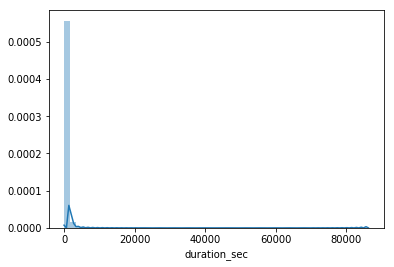

In [23]:
sns.distplot(df["duration_sec"]);

#### Define

Clearly the data is massively skewed towards smaller trip durations and these outlying trip durations prevent us from understanding the bulk of the data. Also, viewing in terms of seconds is not intuitive, feature engineer a duration_min column and plot accordingly.

#### Code

In [24]:
df['duration_min'] = df['duration_sec']/60

#### Test

In [25]:
# Confirm accurate calculation
df.head(1)

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year,duration_min
0,1035,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.40257,Subscriber,No,Male,1988,9.966667


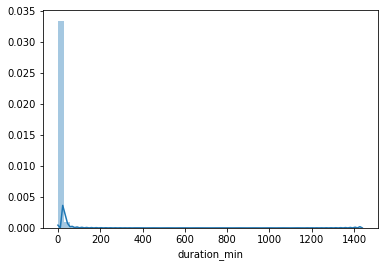

In [26]:
# Re-plot histogram, it should look the same as above but with different x-axis units
sns.distplot(df["duration_min"]);

Considering that bike rentals for customers are priced according to a 30 min limit and subscribers at a 45 min limit, we will focus on a 2 hour trip duration max. This is a reasonable range based on the pricing system and the bulk of trip durations from the above chart.

#### Histogram of durations with focus on bulk of data

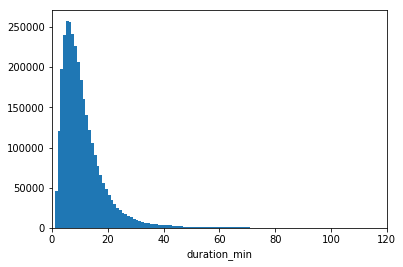

In [27]:
bin_edges = np.arange(0, df['duration_min'].max()+1, 1)
sns.distplot(df['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim((0,120));

#### Insights:
 - The vast majority of bike rides fall between 2 and 20 minutes. Does a 2 minute ride make sense? We should include the 1-3 minute bike rides for now because we don't know the distribution of stations yet. It is possible someone rented a bike and rode it to the next nearest station (for example, a quick 3 block trip down a large hill would be much more convenient than walking it), we will keep these trips in our analysis until we have addition information and can confidently exclude them.
 - The peak of our distribution is around 6 minutes. Due to this being much lower than anticipated, I am included to believe 2-4 minute trips are certainly possible and should not be removed.

### Birth Year

#### Histogram of birth years

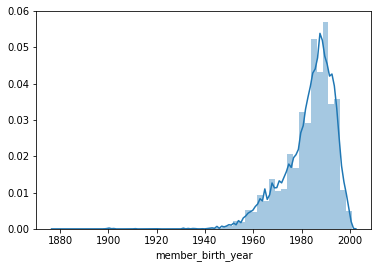

In [28]:
sns.distplot(df["member_birth_year"]);

#### Define
Filter out impossible and unreasonable birth years.

 - The oldest living Californian is 112, so it is impossible for someone to be born before 1907. Additionally, we will drop riders above the age of 85 from our dataset for the sake of focusing on the most important trips and riders. It is possible that someone 85+ is using the bikes, but highly unlikely. Therefore, this extremely small portion of the data can be assumed unreliable. It is possible that these users are over 85, but also possible that these were input errors.

#### Code

In [29]:
df = df.query('member_birth_year > 1906')

#### Test

In [30]:
df.member_birth_year.describe()

count    3.195979e+06
mean     1.983232e+03
std      1.026731e+01
min      1.907000e+03
25%      1.978000e+03
50%      1.986000e+03
75%      1.991000e+03
max      2.001000e+03
Name: member_birth_year, dtype: float64

In [31]:
len(df)

3195979

#### Histogram of birth years with filtering

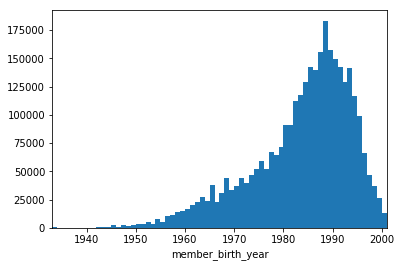

In [32]:
# re-plot birth year distribution after making adjustments
bin_edges = np.arange(0, df['member_birth_year'].max()+1, 1)
sns.distplot(df['member_birth_year'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim((1933,2001));

#### Define
Plotting by birth year doesn't feel quite right, it would be more intuitive to plot by age so that it is more clearly shown that age increases from left to right. This will prevent potential misinterpretations by audiences.

#### Code

In [33]:
df['age'] = 2019-df['member_birth_year']

#### Test

In [34]:
# Confirm accurate calculation
df.head(1)

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year,duration_min,age
0,1035,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.40257,Subscriber,No,Male,1988,9.966667,31


#### Histogram of ages with filtering

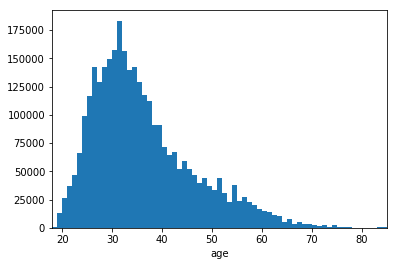

In [35]:
# Re-plot birth year distribution using age variable
bin_edges = np.arange(0, df['age'].max()+1, 1)
sns.distplot(df['age'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim((18,85));

#### Insights:
 - Users between the ages of 25 and 45 represent the bulk of trips
 - Peaks in the early 30s
 - Despite a general downward trend after the early 30s, there appears to be a slight resurgence in trip count around the mid 50s. This is worth a closer look.

### Gender

#### Count of trips by gender

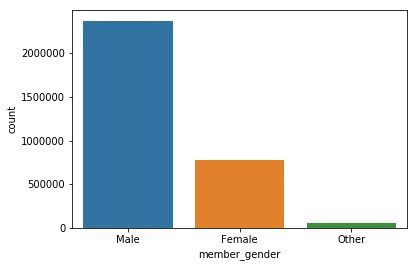

In [36]:
sns.countplot(data = df, x = 'member_gender');

In [37]:
# Proportion of trips by males
len(df.query('member_gender == "Male"'))/len(df)

0.7419125720162743

In [38]:
# Proportion of trips by females
len(df.query('member_gender == "Female"'))/len(df)

0.2416592849953019

#### Insights:
 - 74% of all trips are male users, remember this data is the number of trips, not the number of customers. We cannot discover the proportions of customers or subscribers because we do not have rider IDs to track individual riders separate from trips.
 - According to the US Censuc Bureau SF's gender makeup is 49% female and 51% male. This is very different from our above statistic, so do the gender proportions of our users fit the US Census Bureau's statistics but our male rides use the bikes at a much higher rate? Or do our gender proportions by trip accurately represent out users and therefore women are much less likely to sign up for bike share to begin with? We cannot answer these questions with this dataset, however it is important to take note of this.

### Month of Year

#### Define
Feature engineer a new column for month

#### Code

In [39]:
df['month_of_year'] = df['start_time'].dt.month

#### Test

In [40]:
df.sample(5)

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year,duration_min,age,month_of_year
2674456,1362,516,2018-10-20 16:19:07.534,2018-10-20 16:27:44.011,327,5th St at San Salvador St,37.332039,-121.881766,275,Julian St at 6th St,37.342997,-121.888889,Subscriber,Yes,Male,1996,8.600000,23,10
1963697,3694,401,2019-05-17 21:28:32.469,2019-05-17 21:35:13.493,258,University Ave at Oxford St,37.872355,-122.266447,266,Parker St at Fulton St,37.862464,-122.264791,Subscriber,No,Male,1981,6.683333,38,5
3175274,3013,367,2019-02-05 17:36:13.724,2019-02-05 17:42:20.730,210,45th St at Manila,37.833294,-122.256224,209,45th St at MLK Jr Way,37.833558,-122.267418,Subscriber,No,Male,1951,6.116667,68,2
2444571,3035,392,2018-08-29 13:56:58.059,2018-08-29 14:03:30.462,104,4th St at 16th St,37.767045,-122.390833,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,Subscriber,Yes,Male,1977,6.533333,42,8
2435559,300,1033,2018-08-30 18:30:26.518,2018-08-30 18:47:39.846,81,Berry St at 4th St,37.775880,-122.393170,98,Valencia St at 16th St,37.765052,-122.421866,Subscriber,No,Male,1980,17.216667,39,8


#### Count of trips by month of the year

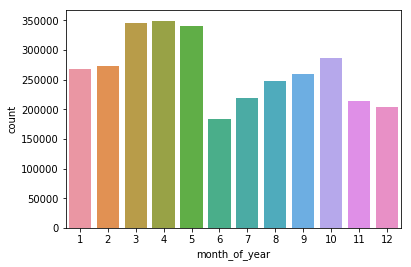

In [41]:
sns.countplot(data = df, x = 'month_of_year');

#### Insights:
 - This is not what I expected to find, the most popular months for rides are some of the coldest months of the year. There aren't large temperature swings between Summer and Winter in SF, however I would not expect 1) such a large difference between seasons, and 2) despite temperatures being similar it is technically a bit warmer and nicer out during those summer months, so shouldn't they be at least a little bit more popular in terms of number of rides? Instead, June, July and August are the 3 of the 5 least popular months.

**What happened here? Check the company website, and check the news for any major changes that took place. Additionally, we collected data for half of 2017, all of 2018, and half of 2019. 2 full years were collected in total, however if data from the first half of each year comes from 2018 and 2019, while the data for the second half of each year from 2017 and 2018, any changes in product offering or popularity could heavily skew this plot.**

 - E-bikes were offered starting in April 2018, so I would expect a spike to begin after the e-bikes are released and remain relatively high over the summer due to the existence of e-bikes paired with better weather. However, this plot shows the beginning of the spike in March, which does not fit my above timeline. This could be skewed because in 2017 SF bikeshare was less popular and in 2019 much more popular. As a result, there was technically data collected twice for all months of the year but the existence of new subscription options, e-bikes, and increasing popularity would cause the months who's second set of data comes from 2019 (Jan-May) to skew our data towards those months which happen to be colder winter months. So this plot shows ridership being skewed towards those months, when in reality ridership is heavily skewed towards year, aka 2019 being massively more popular than 2017 when Ford GoBike began.

Let's plot the above data again, but separate it into separate years. This should help us to still understand seasonal trends despite the spike in ridership due to e-bikes and popularity.

Let's remove 2017 and 2019 data to focus on a single, entire year of data collection. We should look for general seasonality trends, while being aware of the new e-bikes being offered starting in April of 2018.

#### Code

In [42]:
# Create new column for year
df['year'] = df['start_time'].dt.year

#### Test

In [43]:
# Confirm accuracy
df.sample(5)

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year,duration_min,age,month_of_year,year
1566083,3447,1531,2018-05-21 11:54:03.976,2018-05-21 12:19:35.321,97,14th St at Mission St,37.768265,-122.420110,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,No,Female,1957,25.516667,62,5,2018
1801053,2270,358,2018-12-01 15:21:54.546,2018-12-01 15:27:53.059,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,58,Market St at 10th St,37.776619,-122.417385,Customer,No,Male,1996,5.966667,23,12,2018
1821574,440,213,2018-01-26 09:00:42.499,2018-01-26 09:04:16.110,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,27,Beale St at Harrison St,37.788059,-122.391865,Subscriber,No,Male,1961,3.550000,58,1,2018
1338343,5843,467,2019-03-22 09:35:27.065,2019-03-22 09:43:14.173,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,23,The Embarcadero at Steuart St,37.791464,-122.391034,Subscriber,No,Male,1986,7.783333,33,3,2019
2258602,1946,1529,2018-07-29 23:29:51.007,2018-07-29 23:55:20.341,81,Berry St at 4th St,37.775880,-122.393170,22,Howard St at Beale St,37.789756,-122.394643,Subscriber,Yes,Male,1969,25.483333,50,7,2018


#### Define
Create 3 separate DataFrames using .query(), don't use groupby to plot this because the separate DataFrames for each individual year may be helful in the future.

#### Code

In [44]:
# Copy df 3 times, one for each year
df_2017 = df.copy()
df_2018 = df.copy()
df_2019 = df.copy()

In [45]:
# Query to keep only records pertaining to each year
df_2017 = df_2017.query('year == 2017')
df_2018 = df_2018.query('year == 2018')
df_2019 = df_2019.query('year == 2019')

#### Test

In [46]:
# Confirm success
print(df_2017.year.value_counts())
print(df_2018.year.value_counts())
print(df_2019.year.value_counts())
print(len(df))

2017    452794
Name: year, dtype: int64
2018    1740680
Name: year, dtype: int64
2019    1002505
Name: year, dtype: int64
3195979


#### 2017 count of trips by month of the year

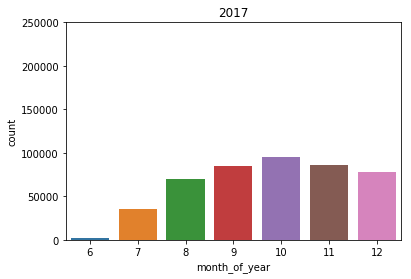

In [47]:
sns.countplot(data = df_2017, x = 'month_of_year');
plt.title('2017')
plt.ylim(0, 250000);

#### Insights:
 - We see a slight seasonal trend from Oct to Dec, however this is not a reliable plot to gather insights as it includes the very first years of the program. The Ford GoBike program was launched in Jun 2017, therefore what wee see here is simply customers learning about the service and signing up to join.

#### 2018 count of trips by month of the year

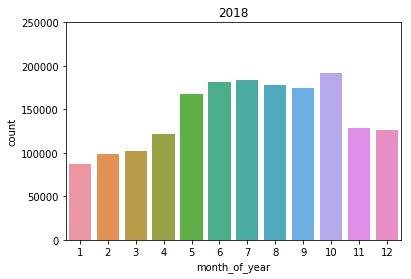

In [48]:
sns.countplot(data = df_2018, x = 'month_of_year');
plt.title('2018')
plt.ylim(0, 250000);

#### Insights:

If we break down this plot using what we know from the above analysis regarding the initial plot, we can see multiple insights.

 - E-bikes were released in Apr 2018. We can't directly determine the amount of increase in rides from seasonality vs. e-bike availability from Apr to May, however I believe that the relatively small decrease from Oct to Nov shows us the impact of e-bikes on number of rides. This is because I would expect a much larger decrease between these months due to seasonal changes than what occured.

 - Despite the apparent spike in rides due to e-bikes (as well as a transition from Winter to Spring), we still see an expected seasonal trend. From Nov-Mar SF has very similary weather and if seasonality didn't play a role in the total number of rides, we would not see rides drop heavily as the weather begins to cool down in Noveber.

#### 2019 count of trips by month of the year

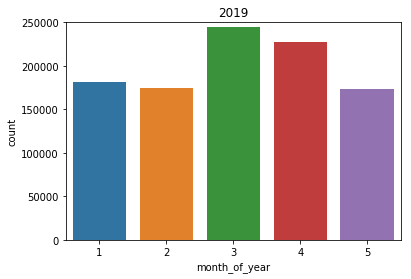

In [49]:
sns.countplot(data = df_2019, x = 'month_of_year');
plt.title('2019')
plt.ylim(0, 250000);

#### Insights:

Why is there such a large decrease in ridership from Apr to May? There should be an increase due to seasonality like what we saw in 2018.

 - In Apr 2019, Ford GoBike was forced to take all e-bikes off the streets due to safety issues. Riders were frequently flipping over off of their bikes and getting injured when attempting to break. This explains the drop in total rides from Apr to May.

### User Type

2 types:
 - Subscribers: members paying a monthly or annual fee
 - Customers: single-ride users

#### Count of trips by user type

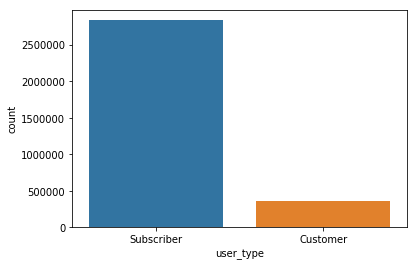

In [50]:
sns.countplot(data = df, x = 'user_type');

In [51]:
# Proportion of trips by subscribers
len(df.query('user_type == "Subscriber"'))/len(df)

0.8866341111753238

In [52]:
# Proportion of trips by customers
len(df.query('user_type == "Customer"'))/len(df)

0.11336588882467626

#### Insights:
 - Subscribers make up the vast majority of rides, as expected (over 88% to be exact)

## Save progress to csv file

#### Save final version of the master dataset

In [53]:
df.to_csv('all_bikeshare_datasets/cleaned_datasets/master-dataset-v4.csv', index=False)

#### Save the filtered version of the master dataset separately, apply the filters decided upon from the above insights
 - Duration: Drop all rows with duration over 120 min
 - Age: Drop all rows with age greater than 85

In [54]:
# Copy master dataset
df_filtered = df.copy()

In [55]:
# Filter for duration
df_filtered = df_filtered.query('duration_min < 120.01')

In [56]:
# Confirm duration filter
df_filtered.duration_min.describe()

count    3.181657e+06
mean     1.132922e+01
std      9.547962e+00
min      1.016667e+00
25%      5.733333e+00
50%      9.016667e+00
75%      1.386667e+01
max      1.200000e+02
Name: duration_min, dtype: float64

In [57]:
# Filter for age
df_filtered = df_filtered.query('age < 86')

In [58]:
# Confirm filter
df_filtered.age.max()

85

In [59]:
# Save to csv file
df_filtered.to_csv('all_bikeshare_datasets/cleaned_datasets/filtered-dataset-v1.csv', index=False)

### Review descriptive statistics for relevant columns of filtered dataset

In [60]:
df_filtered.columns

Index(['bike_id', 'duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'user_type',
       'bike_share_for_all_trip', 'member_gender', 'member_birth_year',
       'duration_min', 'age', 'month_of_year', 'year'],
      dtype='object')

In [61]:
df_filtered[['duration_min', 'age', 'year']].describe()

,duration_min,age,year
count,3.179853e+06,3.179853e+06,3.179853e+06
mean,1.133048e+01,3.573496e+01,2.018173e+03
std,9.548795e+00,1.017668e+01,6.523778e-01
min,1.016667e+00,1.800000e+01,2.017000e+03
25%,5.733333e+00,2.800000e+01,2.018000e+03
50%,9.016667e+00,3.300000e+01,2.018000e+03
75%,1.388333e+01,4.100000e+01,2.019000e+03
max,1.200000e+02,8.500000e+01,2.019000e+03


## Bivariate Exploration

Compare the following variables across user type: Duration, Gender, and Age

***Important: Use df_filtered for the remainder of this analysis. The above univariate exploration helped to filter the dataset in order to focus on the bulk of the data and remove outliers. df_filtered contains our selected bulk of the dataset.***

#### User Types
Subscribers
 - Users paying a monthly or annual subscription to use the bikes
 - 45 min per ride limit, unlimited rides

Customers
 - Users paying for individual trips
 - 30 min per ride limit

Additionally: Some subscribers are part of a "Bike Share for All" Program that offers a discounted, one-time annual membership fee for low-income residents, this feature was not offered in 2017. For this analysis, "Bike Share for All" members will be identified only as Subscribers. Future analyses will differentiate between types of subscribers to explore patterns and relationships.

### Trip Duration by User Type

#### Define
Create subsets of the filtered dataset to help with subscriber and customer specific analysis.

#### Code

In [62]:
df_filtered_subscriber = df_filtered.query('user_type == "Subscriber"')
df_filtered_customer = df_filtered.query('user_type == "Customer"')

#### Test

In [63]:
# Confirm subscriber df is proper length, over 2500000
len(df_filtered_subscriber)

2826327

In [64]:
# Confirm customer df is proper length, over 350000
len(df_filtered_customer)

353526

#### Average trip duration

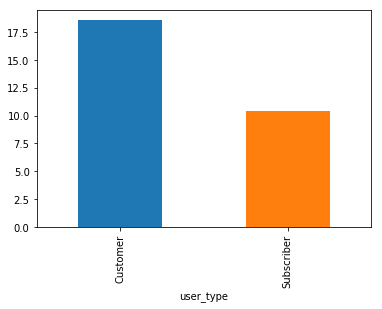

In [65]:
df_filtered.groupby("user_type")['duration_min'].mean().plot(kind='bar');

#### Insights:
 - Customers have a much longer average trip duration than subscribers (but are responsible for a much smaller portion of trips, 11%)
 - If customers take much less trips, but are responsible for much longer trip durations, this leads me to believe that subscribers use Ford GoBike for practical, consistent use, such a daily commutes, while customers are using bikes for leisurely activity and to explore the city (maybe visitors from out of town).

#### Distributions of Durations by User Type

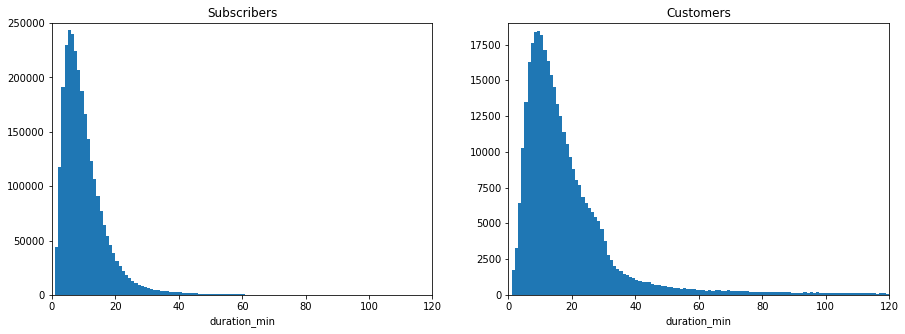

In [66]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots

# Subscriber plot
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df_filtered_subscriber['duration_min'].max()+1, 1)
sns.distplot(df_filtered_subscriber['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.title('Subscribers')
plt.xlim((0,120));
plt.ylim((0,250000));

# Customer plot
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df_filtered_customer['duration_min'].max()+1, 1)
sns.distplot(df_filtered_customer['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.title('Customers')
plt.xlim((0,120));
plt.ylim((0,19000));

#### Insights:
 - Durations for both are heavily right skewed, towards lower durations.
 - Duration for customers is still skewed towards shorter durations, but has a much more gradually decreasing tail which should explain the higher average trip duration. Let's learn more about the tails of each distribution by zooming in.

#### Zoom-in on tail of each distribution

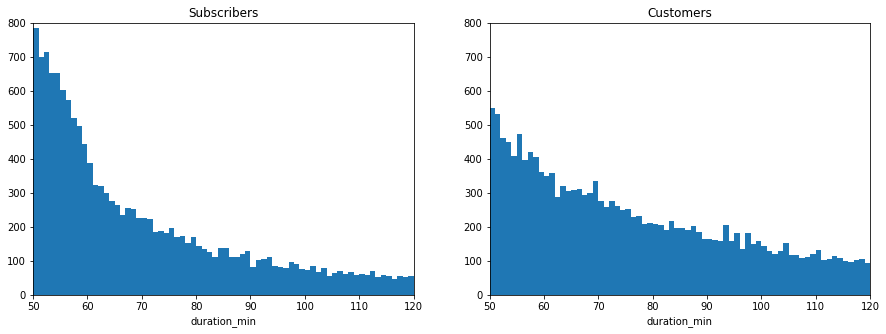

In [67]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots

# Subscriber plot
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df_filtered_subscriber['duration_min'].max()+1, 1)
sns.distplot(df_filtered_subscriber['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.title('Subscribers')
plt.xlim((50,120));
plt.ylim((0,800));

# Customer plot
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df_filtered_customer['duration_min'].max()+1, 1)
sns.distplot(df_filtered_customer['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.title('Customers')
plt.xlim((50,120));
plt.ylim((0,800));

#### Insights:
 - Subscribers have a much larger number of trips under approx. 60 min
 - Customers have a higher number of trips for all durations above approx. 60 min, this gradual tail paired with the less extreme peak at lower values explains why there is such a large difference in average trip duration. It isn't becasue there is a large peak in the distribution for a higher trip duration for subscribers, instead it's becasue of both a low peak paired with the long tail of customers. A much larger proportion of trips with duration >60 min for customers massively increases the average duration.
 - The above plots further illustrate the belief that single-use customers are using the service for long distance city exploration, or are simply traveling at lower speeds due to the leisurely pace that someone would explore the city. While subsribers are using the service for day-to-day commutes.

### Age by User Type

#### Average age

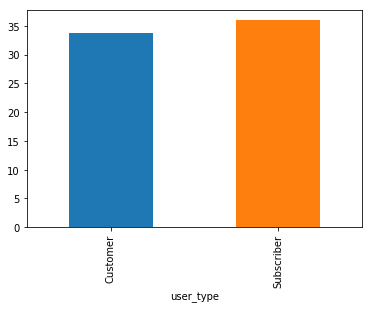

In [68]:
df_filtered.groupby("user_type")['age'].mean().plot(kind='bar');

#### Insights:
 - Subscribers are a bit older than customers, however average age by user type is extremely similar. Let's see if the distributions of each provide more info

#### Distribution of ages by user type

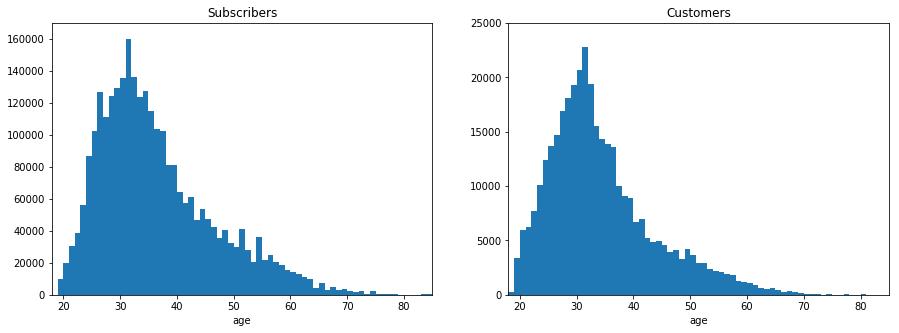

In [69]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots

# Subscriber plot
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df_filtered_subscriber['age'].max()+1, 1)
sns.distplot(df_filtered_subscriber['age'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.title('Subscribers')
plt.xlim((18,85));
plt.ylim((0,170000));

# Customer plot
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df_filtered_customer['age'].max()+1, 1)
sns.distplot(df_filtered_customer['age'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.title('Customers')
plt.xlim((18,85));
plt.ylim((0,25000));

#### Insights:
 - Customers and subscribers have very similar distributions with the majority around ages 25-35
 - Both distributions are right skewed, there is some evidence that subscribers are older on average (based on the previous bar chart), however the evidence is not strong as the average ages are very similar.

### Gender by User Type


Note: Different scales used for each plot's y-axis


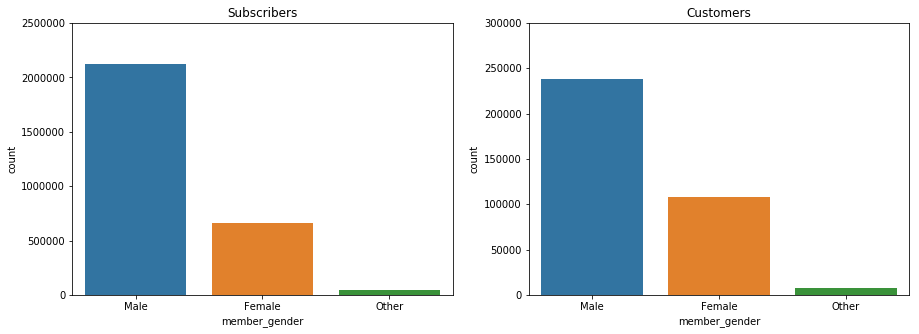

In [70]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots

# Subscriber plot
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sns.countplot(data = df_filtered_subscriber, x = 'member_gender');
plt.title('Subscribers')
plt.ylim(0,2500000);

# Customer plot
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
sns.countplot(data = df_filtered_customer, x = 'member_gender');
plt.title('Customers')
plt.ylim(0,300000);

print()
print("Note: Different scales used for each plot's y-axis")

In [71]:
# Percentage of subscribers who are male
len(df_filtered_subscriber.query('member_gender == "Male"'))/len(df_filtered_subscriber)

0.7512449904062765

In [72]:
# Percentage of subscribers who are female
len(df_filtered_subscriber.query('member_gender == "Female"'))/len(df_filtered_subscriber)

0.23309121697524737

In [73]:
# Percentage of customers who are male
len(df_filtered_customer.query('member_gender == "Male"'))/len(df_filtered_customer)

0.6725615654859897

In [74]:
# Percentage of customers who are female
len(df_filtered_customer.query('member_gender == "Female"'))/len(df_filtered_customer)

0.30612741354242684

#### Insights:
 - We see the same pattern across both user types from greatest to least: male, female, other
 - However, the percentage of trips by males for subscribers is much higher than that of customers, 75% compared to only 67%

### Month of Year by User Type

#### Count of trips by month and user type

Each year will be plotted separately, like above.

***Important: Careful attention to y-axis limits in the following month to month charts. Customers have much fewer trips in total, so we will use smaller y-axis limits for customers in order to better focus on patterns, not totals.***

#### Define
Create a filtered version of the individual year DataFrames

In [75]:
# Copy DataFrames
df_2017_filtered = df_2017.copy()
df_2018_filtered = df_2018.copy()
df_2019_filtered = df_2019.copy()

In [76]:
# Filter out durations over 120 min
df_2017_filtered = df_2017_filtered.query('duration_min < 120.01')
df_2018_filtered = df_2018_filtered.query('duration_min < 120.01')
df_2019_filtered = df_2019_filtered.query('duration_min < 120.01')

In [77]:
# Filter out ages over 85
df_2017_filtered = df_2017_filtered.query('age < 86')
df_2018_filtered = df_2018_filtered.query('age < 86')
df_2019_filtered = df_2019_filtered.query('age < 86')

In [78]:
# Create subscriber and customer DataFrames for each year
df_2017_filtered_subscriber = df_2017_filtered.query('user_type == "Subscriber"')
df_2018_filtered_subscriber = df_2018_filtered.query('user_type == "Subscriber"')
df_2019_filtered_subscriber = df_2019_filtered.query('user_type == "Subscriber"')

df_2017_filtered_customer = df_2017_filtered.query('user_type == "Customer"')
df_2018_filtered_customer = df_2018_filtered.query('user_type == "Customer"')
df_2019_filtered_customer = df_2019_filtered.query('user_type == "Customer"')

#### 2017 count of trips by month and user type


Note: Different scales used for each plot's y-axis because our focus is on trend and identical y-axis 
 units would make it difficult to see trends since customers make up such a small portion of 
 total rides by all users


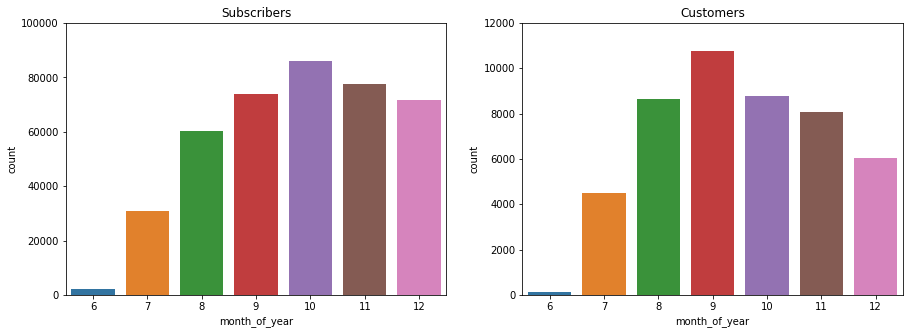

In [79]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots

# Subscriber plot
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sns.countplot(data = df_2017_filtered_subscriber, x = 'month_of_year');
plt.title('2017')
plt.ylim(0, 100000)
plt.title('Subscribers');

# Customer plot
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
sns.countplot(data = df_2017_filtered_customer, x = 'month_of_year');
plt.title('2017')
plt.ylim(0, 12000)
plt.title('Customers');

print()
print("Note: Different scales used for each plot's y-axis because our focus is on trend and identical y-axis \n units would make it difficult to see trends since customers make up such a small portion of \n total rides by all users")

#### Insights:
 - Both subscribers and customers show an extremely similar, almost identical trend in 2017
 - One major difference is for subscribers, we see count decrease starting in Nov, while for customers it starts to decrease in Oct. Could it be leisurely use of bikes, often by visitors, is more affected by changes in weather than those using bikes for practicality?

#### 2018 count of trips by month and user type


Note: Different scales used for each plot's y-axis because our focus is on trend and identical y-axis 
 units would make it difficult to see trends since customers make up such a small portion of 
 total rides by all users


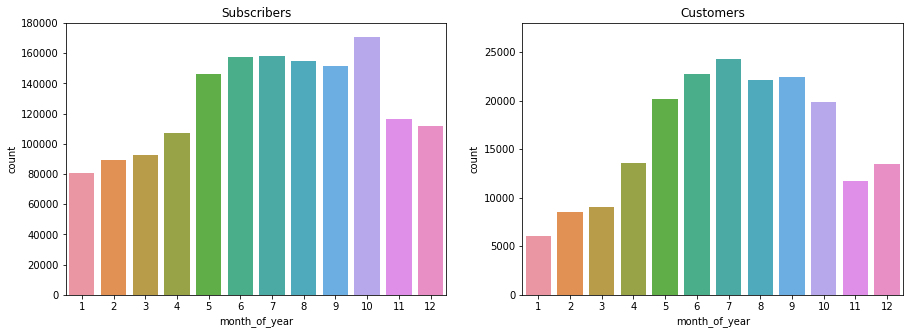

In [80]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots

# Subscriber plot
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sns.countplot(data = df_2018_filtered_subscriber, x = 'month_of_year');
plt.title('2017')
plt.ylim(0, 180000)
plt.title('Subscribers');

# Customer plot
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
sns.countplot(data = df_2018_filtered_customer, x = 'month_of_year');
plt.title('2017')
plt.ylim(0, 28000)
plt.title('Customers');

print()
print("Note: Different scales used for each plot's y-axis because our focus is on trend and identical y-axis \n units would make it difficult to see trends since customers make up such a small portion of \n total rides by all users")

#### Insights:
 - Aside from the spike in trips for subscribers in Oct, we generally see the same trend across both user types
 - However, the degree to which customers were affected by seasonality was vastyly larger than susbscribers. Subscribers' total number of trips in Jan approximately doubled by the time summer ended, whereas customers' total number of trips in Jan approximately quadroupled by the middle of summer.
 - And the percentage increase at the time eBikes were introduced (note this increase is not solely a result of eBikes, but also seasonality) was approx. 31% for subscribers, yet it was approx. 43% for customers. 

#### 2019 count of trips by month and user type


Note: Different scales used for each plot's y-axis because our focus is on trend and identical y-axis 
 units would make it difficult to see trends since customers make up such a small portion of 
 total rides by all users


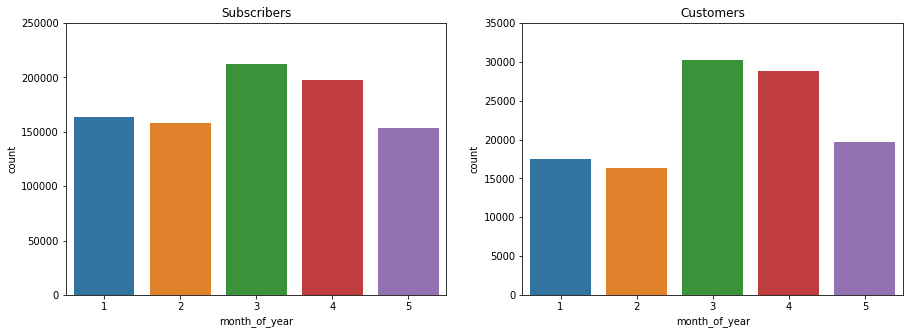

In [81]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots

# Subscriber plot
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sns.countplot(data = df_2019_filtered_subscriber, x = 'month_of_year');
plt.title('2017')
plt.ylim(0, 250000)
plt.title('Subscribers');

# Customer plot
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
sns.countplot(data = df_2019_filtered_customer, x = 'month_of_year');
plt.title('2017')
plt.ylim(0, 35000)
plt.title('Customers');

print()
print("Note: Different scales used for each plot's y-axis because our focus is on trend and identical y-axis \n units would make it difficult to see trends since customers make up such a small portion of \n total rides by all users")

#### Insights:
 - Again, subscribers and customers show a very similar trend, with the only major difference being the percentage increase from Feb to Mar

## Multivariate Exploration

### See Tableau Workbook named multivariate-ford-gobike-tableau-analysis.twbx

#### Compare the following sets of variables:
 - Age, average duration, and gender with a focus on user type

For the time being, do not include additional analysis based on time of year. This appears to be a bit more complex and should be its own, separate analysis.

***Reminder: Use df_filtered for the remainder of this analysis. The above univariate exploration helped to filter the dataset in order to focus on the bulk of the data and remove outliers.***